# Chapter 10 - Lab 1: Principcal Component Analysis

In [1]:
# imports and setup
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

pd.set_option('precision', 4) # number precision for pandas
pd.set_option('display.max_rows', 12)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format', '{:20,.4f}'.format) # get rid of scientific notation

plt.style.use('seaborn') # pretty matplotlib plots

In [2]:
usarrests = pd.read_csv('../datasets/USArrests.csv', index_col=0)

In [3]:
usarrests.mean()

Murder                   7.7880
Assault                170.7600
UrbanPop                65.5400
Rape                    21.2320
dtype: float64

In [4]:
usarrests.var()

Murder                  18.9705
Assault              6,945.1657
UrbanPop               209.5188
Rape                    87.7292
dtype: float64

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# using pipeline
# steps = [('scaler', StandardScaler()),
#          ('pca', PCA())]

# model = Pipeline(steps)

# model.fit(usarrests)

# without pipeline
scaler = StandardScaler()
usarrests_scaled = scaler.fit_transform(usarrests)

pca = PCA()
pca.fit(usarrests_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [6]:
scaler.mean_

array([   7.788,  170.76 ,   65.54 ,   21.232])

In [7]:
scaler.scale_

array([  4.31173469,  82.50007515,  14.3292847 ,   9.27224762])

In [8]:
# rotation matrix

pd.DataFrame(pca.components_.T,
             index=usarrests.columns,
             columns=['PC' + str(i+1) for i in range(len(pca.components_))])

,PC1,PC2,PC3,PC4
Murder,0.5359,0.4182,-0.3412,0.6492
Assault,0.5832,0.1880,-0.2681,-0.7434
UrbanPop,0.2782,-0.8728,-0.3780,0.1339
Rape,0.5434,-0.1673,0.8178,0.0890


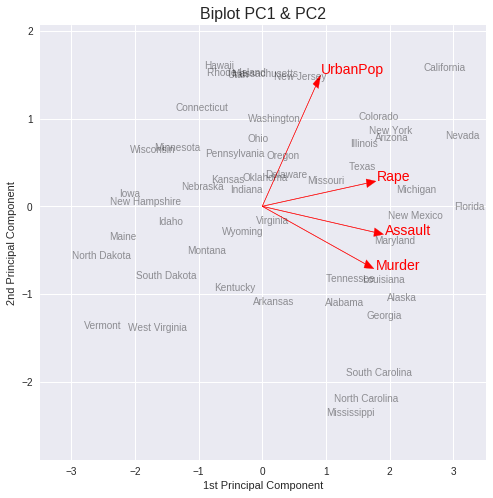

In [9]:
# 0,1 denote PC1 and PC2; change values for other PCs
xvector = pca.components_[0] # see 'prcomp(my_data)$rotation' in R
yvector = -pca.components_[1]

xs = pca.transform(usarrests_scaled)[:,0] # see 'prcomp(my_data)$x' in R
ys = -pca.transform(usarrests_scaled)[:,1]

## visualize projections

plt.figure(figsize=(8, 8))

for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.005, head_width=0.1)
    plt.text(xvector[i]*max(xs)*1.1, yvector[i]*max(ys)*1.1,
             usarrests.columns[i], color='r', size=14)

for i in range(len(xs)):
# circles project documents (ie rows from csv) as points onto PC axes
    # plt.plot(xs[i], ys[i], 'bo')
    plt.text(xs[i], ys[i], usarrests.index[i], color='black', alpha=0.4)
    
plt.title('Biplot PC1 & PC2', size=16)    
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')

m = 0.5
plt.xlim(min(xs) - m, max(xs) + m)
plt.ylim(min(ys) - m, max(ys) + m);

In [10]:
pca.explained_variance_, pca.explained_variance_ratio_

(array([ 2.53085875,  1.00996444,  0.36383998,  0.17696948]),
 array([ 0.62006039,  0.24744129,  0.0891408 ,  0.04335752]))

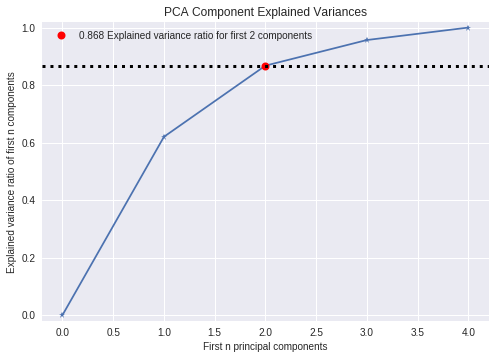

In [11]:
from scikitplot.decomposition import plot_pca_component_variance

plot_pca_component_variance(pca, target_explained_variance=0.8);